In [6]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

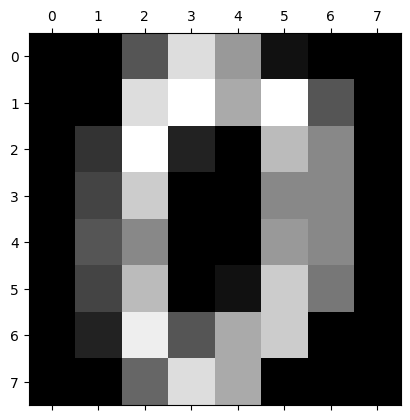

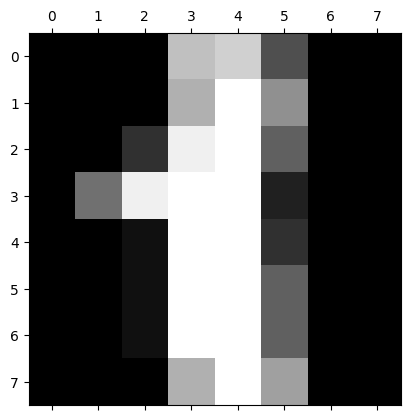

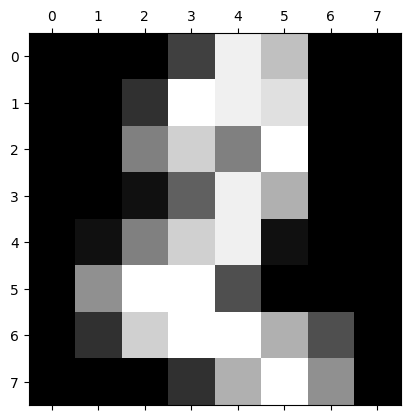

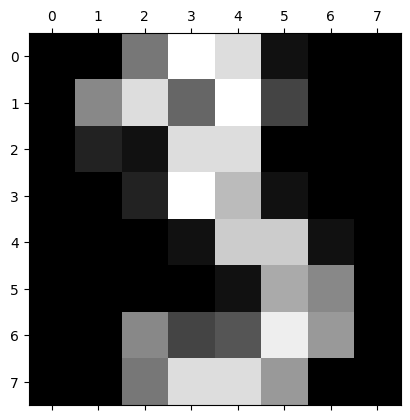

In [14]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [15]:
df = pd.DataFrame(digits.data)
df.head

<bound method NDFrame.head of        0    1     2     3     4     5   ...   58    59    60    61   62   63
0     0.0  0.0   5.0  13.0   9.0   1.0  ...  6.0  13.0  10.0   0.0  0.0  0.0
1     0.0  0.0   0.0  12.0  13.0   5.0  ...  0.0  11.0  16.0  10.0  0.0  0.0
2     0.0  0.0   0.0   4.0  15.0  12.0  ...  0.0   3.0  11.0  16.0  9.0  0.0
3     0.0  0.0   7.0  15.0  13.0   1.0  ...  7.0  13.0  13.0   9.0  0.0  0.0
4     0.0  0.0   0.0   1.0  11.0   0.0  ...  0.0   2.0  16.0   4.0  0.0  0.0
...   ...  ...   ...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...
1792  0.0  0.0   4.0  10.0  13.0   6.0  ...  2.0  14.0  15.0   9.0  0.0  0.0
1793  0.0  0.0   6.0  16.0  13.0  11.0  ...  6.0  16.0  14.0   6.0  0.0  0.0
1794  0.0  0.0   1.0  11.0  15.0   1.0  ...  2.0   9.0  13.0   6.0  0.0  0.0
1795  0.0  0.0   2.0  10.0   7.0   0.0  ...  5.0  12.0  16.0  12.0  0.0  0.0
1796  0.0  0.0  10.0  14.0   8.0   1.0  ...  8.0  12.0  14.0  12.0  1.0  0.0

[1797 rows x 64 columns]>

In [16]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
df['target'] = digits.target
df.head

<bound method NDFrame.head of         0    1     2     3     4     5  ...    59    60    61   62   63  target
0     0.0  0.0   5.0  13.0   9.0   1.0  ...  13.0  10.0   0.0  0.0  0.0       0
1     0.0  0.0   0.0  12.0  13.0   5.0  ...  11.0  16.0  10.0  0.0  0.0       1
2     0.0  0.0   0.0   4.0  15.0  12.0  ...   3.0  11.0  16.0  9.0  0.0       2
3     0.0  0.0   7.0  15.0  13.0   1.0  ...  13.0  13.0   9.0  0.0  0.0       3
4     0.0  0.0   0.0   1.0  11.0   0.0  ...   2.0  16.0   4.0  0.0  0.0       4
...   ...  ...   ...   ...   ...   ...  ...   ...   ...   ...  ...  ...     ...
1792  0.0  0.0   4.0  10.0  13.0   6.0  ...  14.0  15.0   9.0  0.0  0.0       9
1793  0.0  0.0   6.0  16.0  13.0  11.0  ...  16.0  14.0   6.0  0.0  0.0       0
1794  0.0  0.0   1.0  11.0  15.0   1.0  ...   9.0  13.0   6.0  0.0  0.0       8
1795  0.0  0.0   2.0  10.0   7.0   0.0  ...  12.0  16.0  12.0  0.0  0.0       9
1796  0.0  0.0  10.0  14.0   8.0   1.0  ...  12.0  14.0  12.0  1.0  0.0       8

[1797 row

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis = 'columns'),digits.target,test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [46]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
model.score(X_test,y_test)

0.9805555555555555

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[30,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 38,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

Text(95.72222222222221, 0.5, 'Truth')

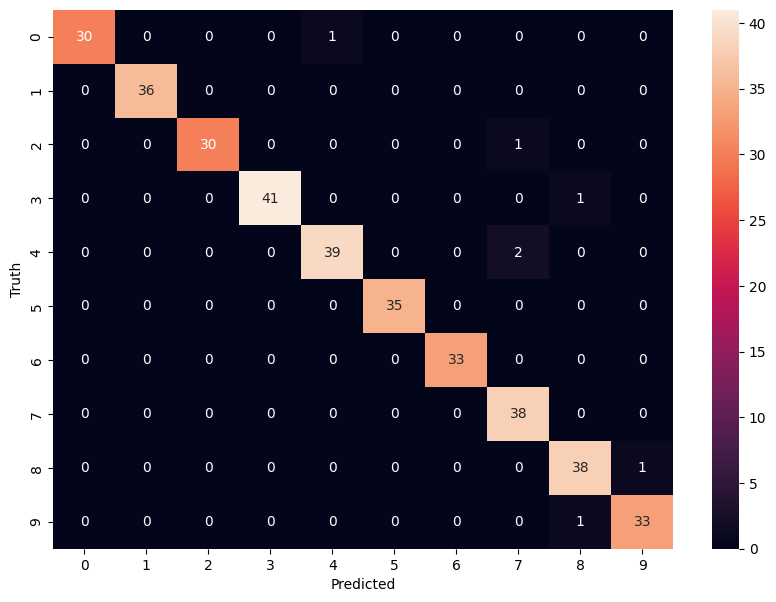

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')